### 因为svm是依据距离来计算d margin的 所以需要标准化

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X=iris.data
y=iris.target
X=X[y<2,:2]
y=y[y<2]

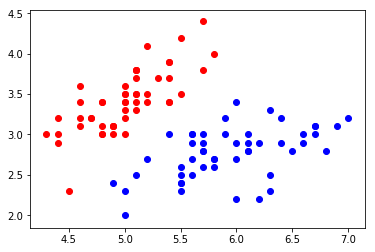

In [4]:
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")

In [5]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X)
X_std = std.transform(X)

In [8]:
from sklearn.svm import LinearSVC

In [7]:
# SVC = sUPPORT VECTOR CLASSIFIER

In [9]:
svc = LinearSVC(C=1e9)
svc.fit(X_std, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [10]:
def plot_decision_boundry(model, axis):
    # meshgrid 可以参考项目03-第3章JupyterNotebook_numpy和map/numpy.ipynb
    # 其实就是分别生成按行看的矩阵和 按列看的矩阵
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(1, -1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A", "#FFF59D", "#90CAF9"])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    return

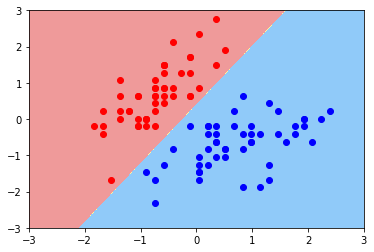

In [12]:
plot_decision_boundry(svc, axis=[-3,3,-3,3])
plt.scatter(X_std[y==0,0], X_std[y==0,1], color="red")
plt.scatter(X_std[y==1,0], X_std[y==1,1], color="blue")

In [13]:
# C越大 代表我们对错误的惩罚就越大, 就是越趋近于hard margin svm

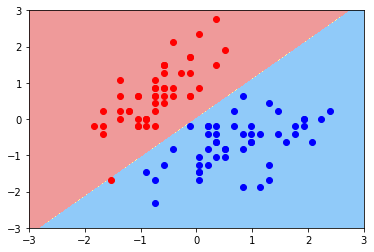

In [15]:
svc2 = LinearSVC(C=0.01)
svc2.fit(X_std, y)
plot_decision_boundry(svc2, axis=[-3,3,-3,3])
plt.scatter(X_std[y==0,0], X_std[y==0,1], color="red")
plt.scatter(X_std[y==1,0], X_std[y==1,1], color="blue")

In [16]:
# 可以看到有个点被错误的分类了

In [17]:
svc.coef_

array([[ 4.03238581, -2.49292896]])

In [18]:
# 这是一个二维数组, 这是因为sklearn中的支持多分类问题, 所以是个二维数组
# 然后每一个向量代表一个分割中的2个feature

In [19]:
svc.intercept_

array([0.95367729])

## 绘制带有margin的决策边界

In [23]:
def plot_svc_decision_boundry(model, axis):
    # meshgrid 可以参考项目03-第3章JupyterNotebook_numpy和map/numpy.ipynb
    # 其实就是分别生成按行看的矩阵和 按列看的矩阵
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(1, -1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A", "#FFF59D", "#90CAF9"])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    
    # 绘制另外的2条线
    # margin
    w = model.coef_[0]
    b = model.intercept_[0]
    # w0 * x0+ w1*x1 +b = 0
    # -> x1 = -b/w1 - w0*x0/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    
    #w0 * x0+ w1*x1 +b = １
    up_y = -w[0]*plot_x/w[1] - b/w[1] + 1/w[1]
    #w0 * x0+ w1*x1 +b = -1
    down_y = -w[0]*plot_x/w[1] - b/w[1] - 1/w[1]
    
    # 为了绘制在一个图上 所以要对y做下限制
    up_index = (up_y>=axis[2]) & (up_y<=axis[3])
    down_index = (down_y>=axis[2]) & (down_y<=axis[3])
    
    plt.plot(plot_x[up_index], up_y[up_index], color="black")
    plt.plot(plot_x[down_index], down_y[down_index], color="black")    
    return

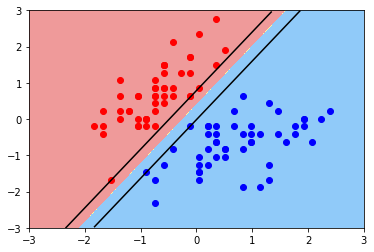

In [25]:
plot_svc_decision_boundry(svc, [-3,3,-3,3])
plt.scatter(X_std[y==0,0], X_std[y==0,1], color="red")
plt.scatter(X_std[y==1,0], X_std[y==1,1], color="blue")

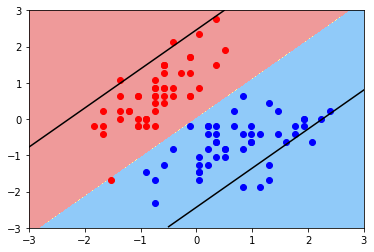

In [26]:
plot_svc_decision_boundry(svc2, [-3,3,-3,3])
plt.scatter(X_std[y==0,0], X_std[y==0,1], color="red")
plt.scatter(X_std[y==1,0], X_std[y==1,1], color="blue")

In [27]:
svc

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [ ]:
# 多分类问题时时OVR = one vs rest
# penalty = L2 Regulizer
# 下一节会介绍核函数 Kernal method 来解决非线性问题